<a href="https://colab.research.google.com/github/Ruby1517/Weather_prediction/blob/main/Weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **Inroduction**

### **Objective of this Notebook:**
* Easy and **Begginers guide**.
* Analyse each and every **attributes** in the dataset.
* Build various **ML Models** with the view of **increasing accuracy** of the model.


### The **Machine Learning Models** used are:
1. K-Nearest Neighbour(KNN)
2. Support Vector Machine(SVM)
3. Gradient Boost
4. Extreme Gradient Boosting(XGBC)

# 2. **Importing the required libraries**

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import missingno as mso
# from scipy.stats import ttest_ind
from scipy.stats import pearsonr

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### **3. Analysing the dataset**

There are **6 variables** in this dataset:

* 4 Continuous variables.
* **1 variable** to accommodate the data
* **1 variable refers the weather.

In [56]:
weather_df = pd.read_csv("drive/MyDrive/Weather_prediction/data/seattle-weather.csv")

In [57]:
weather_df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [58]:
weather_df.shape


(1461, 6)

This data has **6 columns** with total of **1461 rows** as our observation

### **4. Data exploration**

It is the process of exploring the data from the **raw** dataset which we have taken or imported.

First let us deal with the **categorical vatiables**


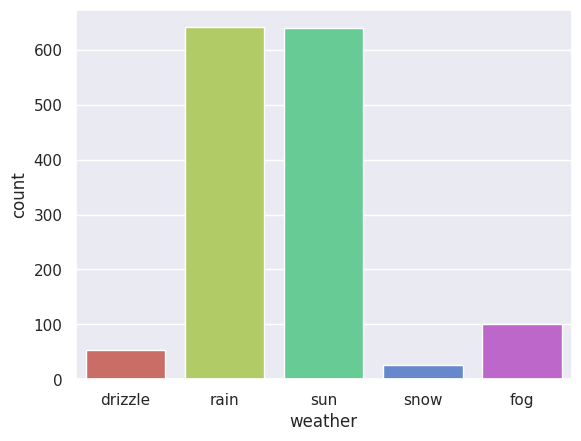

In [59]:
import warnings
warnings.filterwarnings("ignore")
sns.countplot(x="weather", data=weather_df, palette="hls")
plt.show()

In [60]:
countRain = len(weather_df[weather_df.weather == 'rain'])
countSun = len(weather_df[weather_df.weather == 'sun'])
countDrizzle = len(weather_df[weather_df.weather == 'drizzle'])
countSnow = len(weather_df[weather_df.weather == 'snow'])
countFog = len(weather_df[weather_df.weather == 'fog'])

print("Percent of Rain:{:2f}%".format((countRain/(len(weather_df.weather))*100)))
print("Percent of Sun:{:2f}%".format((countSun/(len(weather_df.weather))*100)))
print("Percent of Drizzle:{:2f}%".format((countDrizzle/(len(weather_df.weather))*100)))
print("Percent of Snow:{:2f}%".format((countSnow/(len(weather_df.weather))*100)))
print("Percent of Fog:{:2f}%".format((countFog/(len(weather_df.weather))*100)))

Percent of Rain:43.874059%
Percent of Sun:43.805613%
Percent of Drizzle:3.627652%
Percent of Snow:1.779603%
Percent of Fog:6.913073%


### **5. Numerical or continuous variables**

In [61]:
weather_df[["precipitation", "temp_max", "temp_min", "wind"]].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


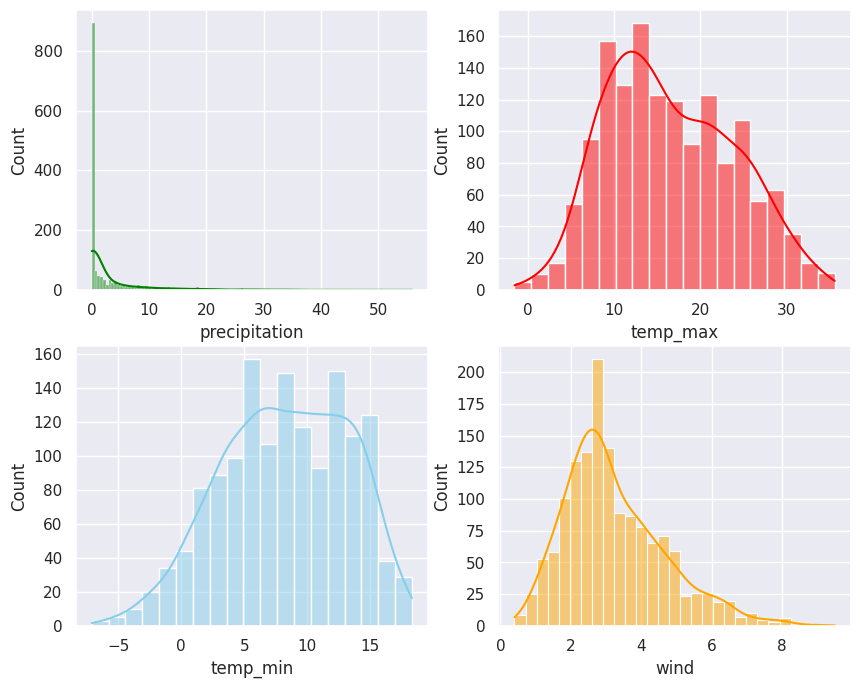

In [62]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2, 2, figsize=(10, 8))
sns.histplot(data=weather_df, x="precipitation", kde=True, ax=axs[0,0], color="green")
sns.histplot(data=weather_df, x="temp_max", kde=True, ax=axs[0,1], color="red")
sns.histplot(data=weather_df, x="temp_min", kde=True, ax=axs[1,0], color="skyblue")
sns.histplot(data=weather_df, x="wind", kde=True, ax=axs[1,1], color="orange")
plt.show()

From the above distribution it is clear that **precipitation and wind** are **Positively skewed**.

And **temp_min** is **Negatively skewed** and both has someoutliers.

## **6. How to find the outliers or skew in data set?**

* We can find the outliers in the dataset by using following plots:
  1. Hist plot
  2. Box plot
  3. violin plot
  4. dist plot yet both box and violin plots are easier to habdel with.

### **6.1 Violin Plot**

<Axes: xlabel='wind'>

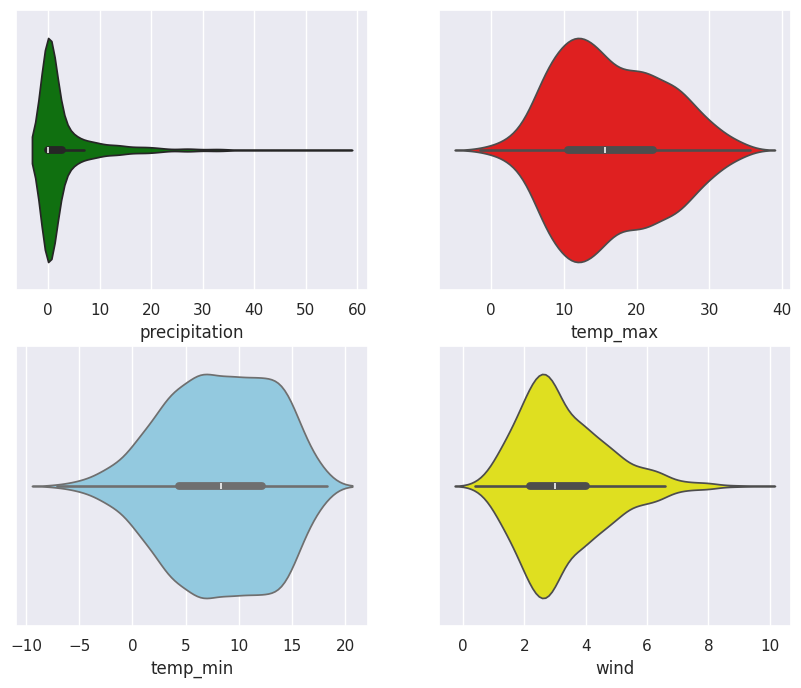

In [63]:
sns.set(style="darkgrid")
fig, axs=plt.subplots(2,2, figsize=(10,8))
sns.violinplot(data=weather_df, x="precipitation", ax=axs[0,0], color="green")
sns.violinplot(data=weather_df, x="temp_max", ax=axs[0,1], color="red")
sns.violinplot(data=weather_df, x="temp_min", ax=axs[1,0], color="skyblue")
sns.violinplot(data=weather_df, x="wind", ax=axs[1,1], color="yellow")


From the above **Violin Plot** we can clearly understand the skewness of the data as the **Tail** indicates the skewness

### **6.2 Skewness using Boxplot**

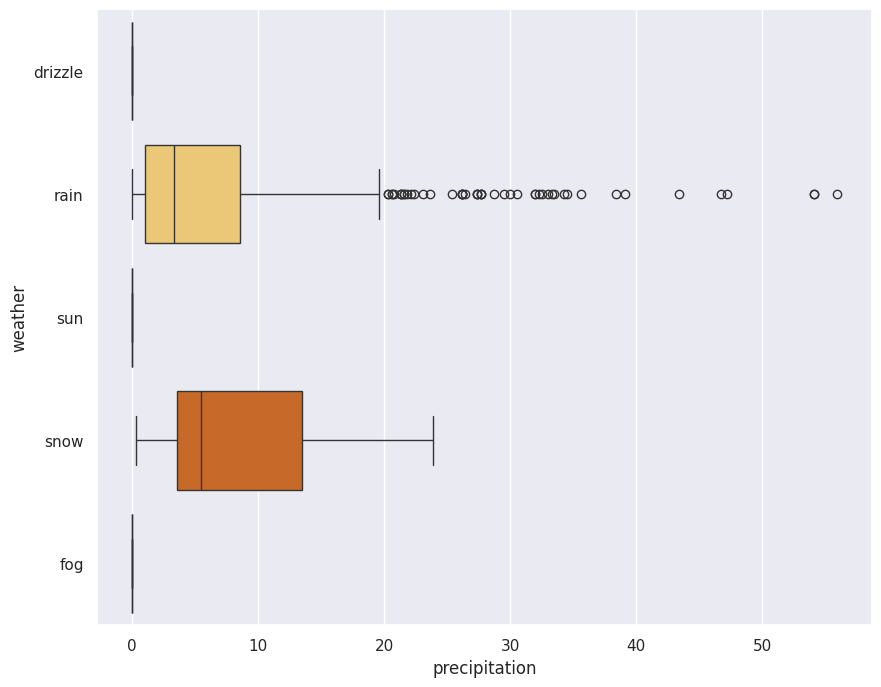

In [64]:
plt.figure(figsize=(10,8))
sns.boxplot(weather_df, x="precipitation", y="weather", palette="YlOrBr")
plt.show()

From the above plot between the weather and precipitation the values **rain** has many **positive outliers** and both **rain and snow** were **positively skewed/has positive skewness**.

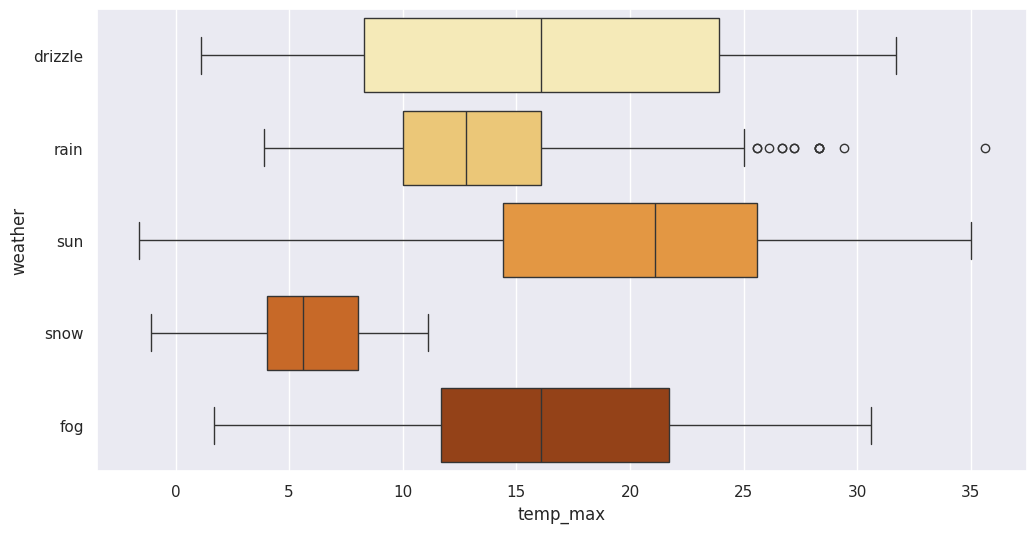

In [65]:
plt.figure(figsize=(12,6))
sns.boxplot(weather_df, x="temp_max", y="weather", palette="YlOrBr")
plt.show()


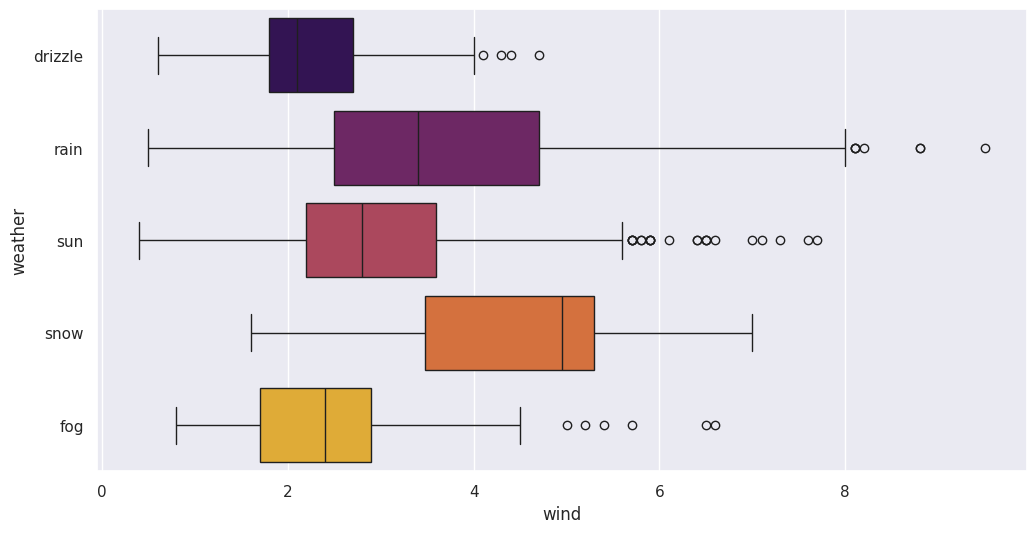

In [66]:
plt.figure(figsize=(12,6))
sns.boxplot(weather_df, x="wind", y="weather", palette="inferno")
plt.show()

From the above box plots, we came to know that every attribute of weather has some **positive outliers** and it is both types of skewness.

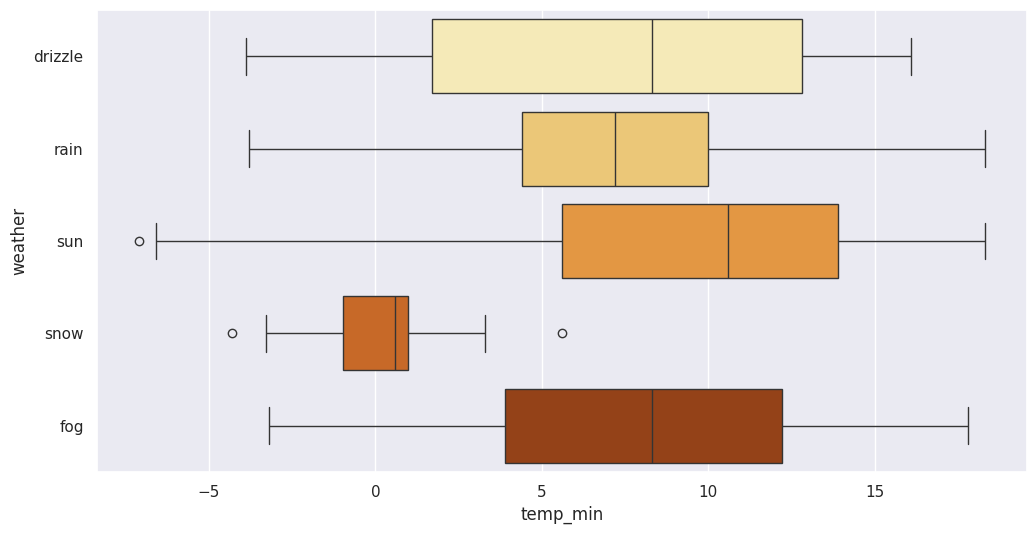

In [67]:
plt.figure(figsize=(12,6))
sns.boxplot(weather_df, x="temp_min", y="weather", palette="YlOrBr")
plt.show()

### **Heatmap**

In [68]:
weather_df['date'] = pd.to_datetime(weather_df['date'])

In [69]:
weather_df['weather']

0       drizzle
1          rain
2          rain
3          rain
4          rain
         ...   
1456       rain
1457       rain
1458        fog
1459        sun
1460        sun
Name: weather, Length: 1461, dtype: object

In [70]:
weather_df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

### **Scaling the weather variables using label encoder**

This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points are, like support vector machines (SVM) or k-nearest neighbors (KNN).

In [89]:
# Convert categorical columns to numerical
lc=LabelEncoder()
weather_df['weather']=lc.fit_transform(weather_df['weather'])
weather_df.head(20)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,1
2,2012-01-03,0.8,11.7,7.2,2.3,1
3,2012-01-04,20.3,12.2,5.6,4.7,1
4,2012-01-05,1.3,8.9,2.8,6.1,1
5,2012-01-06,2.5,4.4,2.2,2.2,1
6,2012-01-07,0.0,7.2,2.8,2.3,1
7,2012-01-08,0.0,10.0,2.8,2.0,2
8,2012-01-09,4.3,9.4,5.0,3.4,1
9,2012-01-10,1.0,6.1,0.6,3.4,1


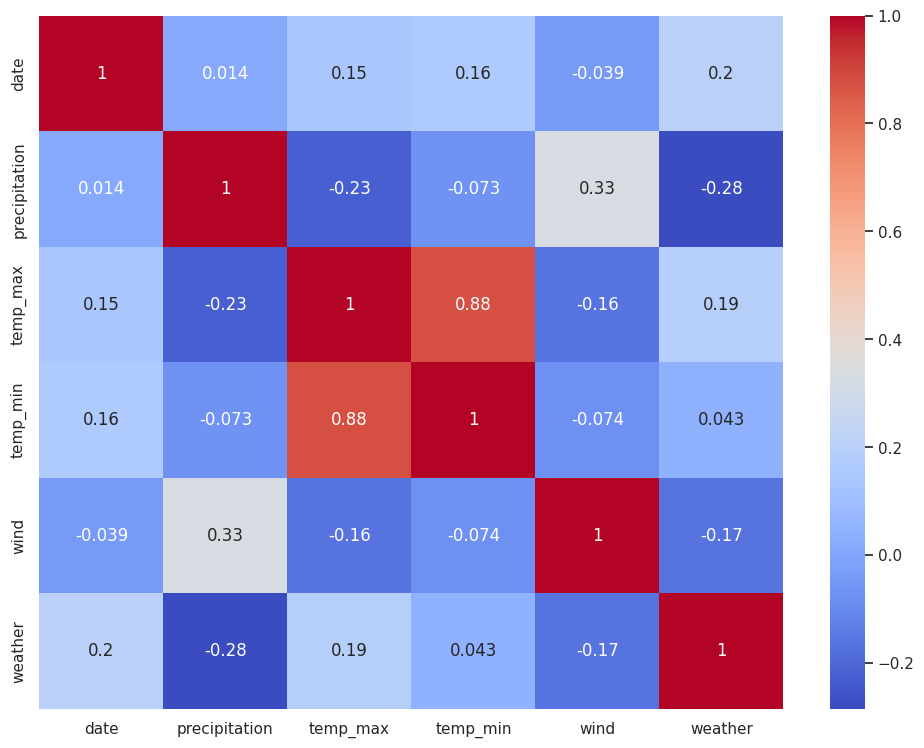

In [90]:
plt.figure(figsize=(12,9))
sns.heatmap(weather_df.corr(), annot=True, cmap="coolwarm")
plt.show()

### **Numerical - Numerical**

Pearson correlation: -0.22855481643297046
T Test and P value: TtestResult(statistic=-51.60685279531918, pvalue=0.0, df=2920.0)


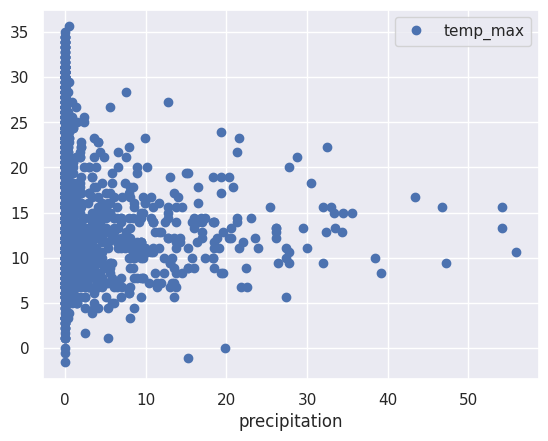

In [91]:
import scipy.stats as stats
weather_df.plot("precipitation", "temp_max", style='o')
print("Pearson correlation:", weather_df['precipitation'].corr(weather_df["temp_max"]))
print("T Test and P value:", stats.ttest_ind(weather_df["precipitation"], weather_df["temp_max"]))

Pearson correlation: -0.16485663487495486
T Test and P value: TtestResult(statistic=-67.3601643301846, pvalue=0.0, df=2920.0)


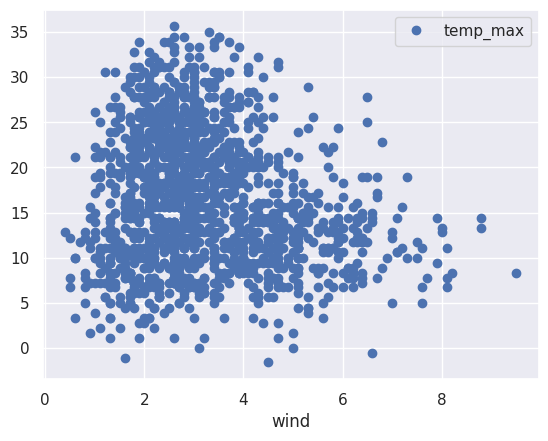

In [92]:
weather_df.plot("wind", "temp_max", style='o')
print("Pearson correlation:", weather_df['wind'].corr(weather_df["temp_max"]))
print("T Test and P value:", stats.ttest_ind(weather_df["wind"], weather_df["temp_max"]))

As from the above result of **T test and P value of 0** indicates that the **Null hypothesis** in the corresponding columns is **rejected** and the columns are **Statistically significant**

<Axes: xlabel='temp_max'>

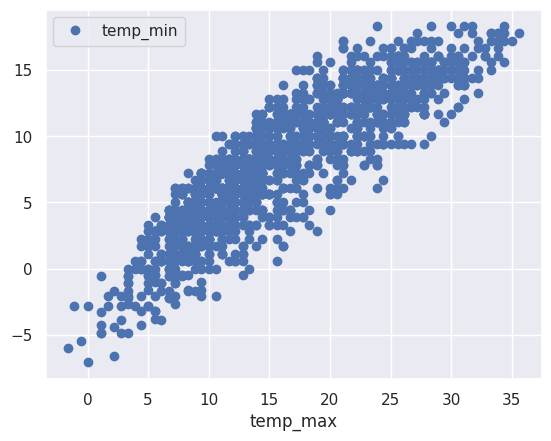

In [93]:
weather_df.plot("temp_max", "temp_min", style='o')

## **7.Null Values**

In [94]:
weather_df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

### Checking for Null values in the data set

The below plot shows that all the columns in the data set doesn't contains Null values as each columns contains a total of 1461 observations.

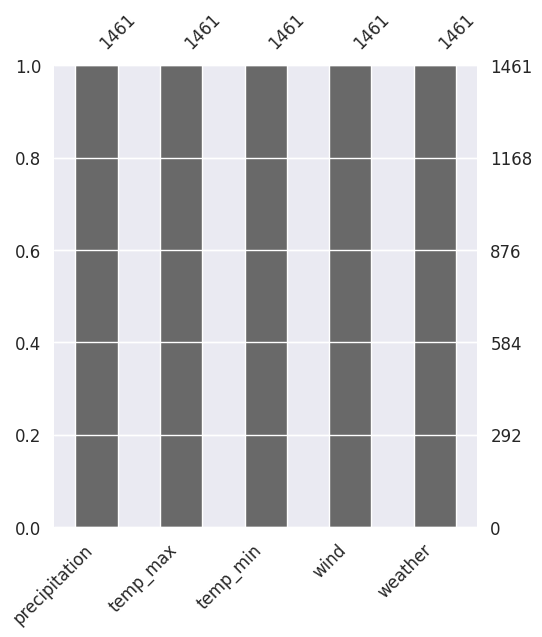

In [95]:
plt.figure(figsize=(12,6))
axz=plt.subplot(1, 2, 2)
mso.bar(weather_df.drop(["date"], axis=1), ax=axz, fontsize=12);

# **Data Preprocessing**

### Drop unnecessary variables
In this dataset "date" is a unnecessary variable as it does not affect the data so it can be drpped.

In [96]:
df = weather_df.drop(columns=["date"], axis=1)
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,1
2,0.8,11.7,7.2,2.3,1
3,20.3,12.2,5.6,4.7,1
4,1.3,8.9,2.8,6.1,1


**Remove Outliers & infinite values**

Since this dataset contains **Outliers, it will be removed**, to make dataset more even.

In [97]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1*IQR))).any(axis=1)]

### **Skewed distribution treatment**

In [98]:
df.precipitation=np.sqrt(df.precipitation)
df.wind=np.sqrt(df.wind)

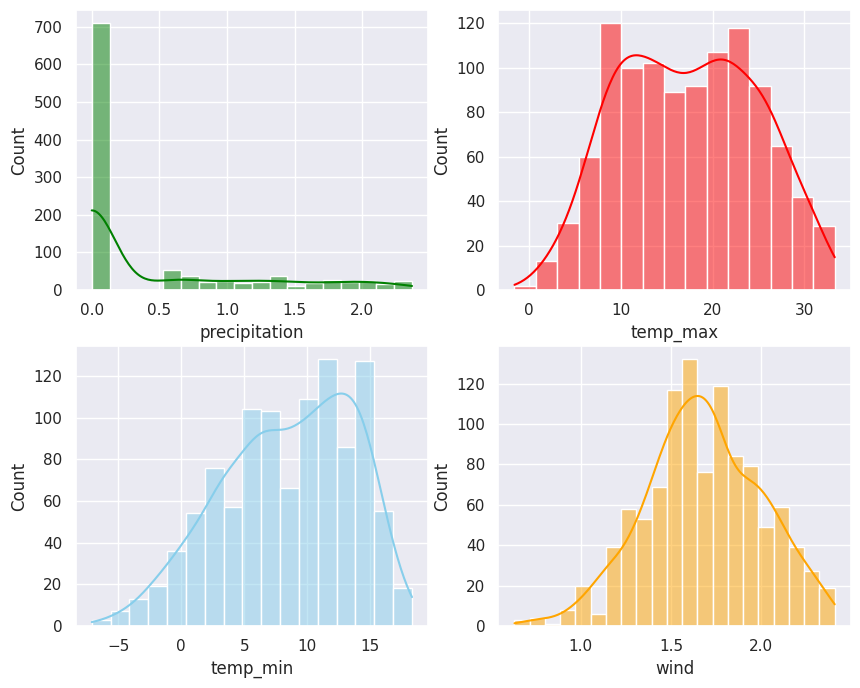

In [99]:
sns.set(style="darkgrid")
fig,axs=plt.subplots(2, 2, figsize=(10, 8))
sns.histplot(data=df, x="precipitation", kde=True, ax=axs[0,0], color="green")
sns.histplot(data=df, x="temp_max", kde=True, ax=axs[0,1], color="red")
sns.histplot(data=df, x="temp_min", kde=True, ax=axs[1,0], color="skyblue")
sns.histplot(data=df, x="wind", kde=True, ax=axs[1,1], color="orange")
plt.show()

In [100]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.000000,12.8,5.0,2.167948,0
2,0.894427,11.7,7.2,1.516575,1
5,1.581139,4.4,2.2,1.483240,1
6,0.000000,7.2,2.8,1.516575,1
7,0.000000,10.0,2.8,1.414214,2


### **Spliting the dataset into dependant and independant variables**

In [101]:
X = ((df.loc[:, df.columns != 'weather']).astype(int)).values[:, 0:]
y = df["weather"].values

In [104]:
df.weather.unique()


array([0, 1, 2, 3])

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **9. Algorithms and Model Training**

In [107]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(X_test,y_test)*100))

KNN Accuracy:77.93%


## **Support vector machine**

In [110]:
svm = SVC()
svm.fit(X_train, y_train)
print("SVM Accuracy:{:.2f}%".format(svm.score(X_test, y_test)*100))

SVM Accuracy:80.75%


In [111]:
import warnings
warnings.filterwarnings("ignore")
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
print("XGB Accuracy:{:.2f}%".format(xgb.score(X_test, y_test)*100))

XGB Accuracy:80.75%


## **Check for the user input**

In [114]:
input=[[1.140175,8.9,2.8,2.469818]]
ot = xgb.predict(input)
print("the weather is:", ot)
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("snow")
else:
    print("Sun")


the weather is: [1]
Fog
